<a href="https://colab.research.google.com/github/Aleena24/reinforcement-learning/blob/main/MAB_with_UCB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate slot machines (bandits)

**Simulating Slot Machines:** 5 slot machines are defined, each with different chances of giving a reward (true_probs). The pull_machine() function simulates pulling a machine and returns 1 (reward) or 0 (no reward) based on the machine's probability.

In [49]:
n_machines = 5
true_probs = [0.84, 0.90, 0.53, 0.67, 0.72]
n_rounds = 1000

def pull_machine(machine_idx):
    return 1 if np.random.rand() < true_probs[machine_idx] else 0


# UCB Algorithm


UCB Variables:

*   n_pulls: Tracks how many times each machine has been played.
*   sum_rewards: The sum of rewards collected from each machine.
*   ucb_values: The UCB score for each machine, used to decide which machine to play next.








In [50]:
n_pulls = np.zeros(n_machines)
sum_rewards = np.zeros(n_machines)
average_rewards = np.zeros(n_machines)
total_reward = 0
ucb_values = np.zeros(n_machines)
rewards_history = []

UCB Score Calculation: In each round, for each machine:

If the machine has been played before, its UCB score is calculated using the formula.
If the machine has never been played, it gets an infinite score to ensure it is explored at least once.

In [51]:
for t in range(1, n_rounds + 1):

    for i in range(n_machines):
        if n_pulls[i] > 0:

            average_rewards[i] = sum_rewards[i] / n_pulls[i]

            ucb_values[i] = average_rewards[i] + np.sqrt((2 * np.log(t)) / n_pulls[i])
        else:

            ucb_values[i] = float('inf')

    machine_idx = np.argmax(ucb_values)

    reward = pull_machine(machine_idx)

    n_pulls[machine_idx] += 1
    sum_rewards[machine_idx] += reward
    total_reward += reward
    rewards_history.append(total_reward)

In [52]:
print(f"Total Reward: {total_reward}")
print(f"Number of times each machine was played: {n_pulls}")
print(f"Estimated probabilities of rewards: {average_rewards}")

Total Reward: 827
Number of times each machine was played: [173. 583.  49. 104.  91.]
Estimated probabilities of rewards: [0.78034682 0.91237113 0.53061224 0.70192308 0.67032967]


# Visualization

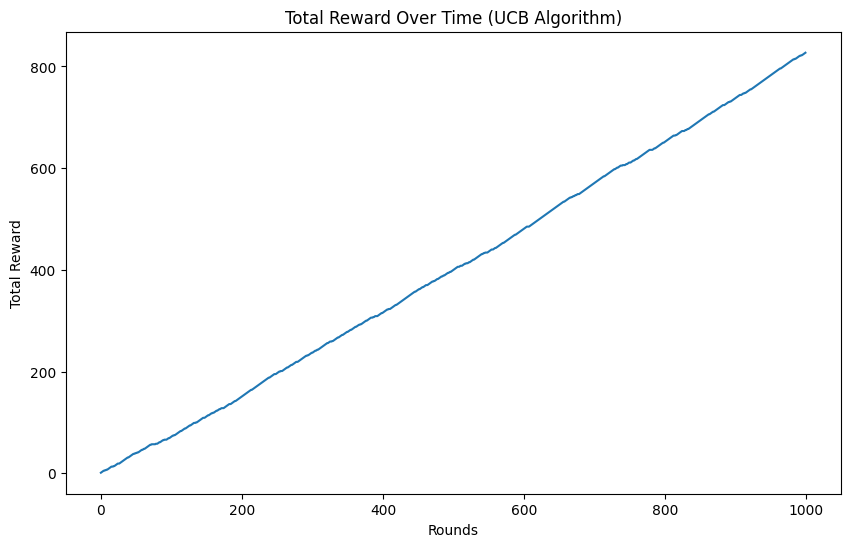

In [53]:
plt.figure(figsize=(10,6))
plt.plot(rewards_history)
plt.title('Total Reward Over Time (UCB Algorithm)')
plt.xlabel('Rounds')
plt.ylabel('Total Reward')
plt.show()

Total Reward Over Time: The total reward increases over time as the UCB algorithm learns which machine gives the best rewards and focuses on playing that machine more often.

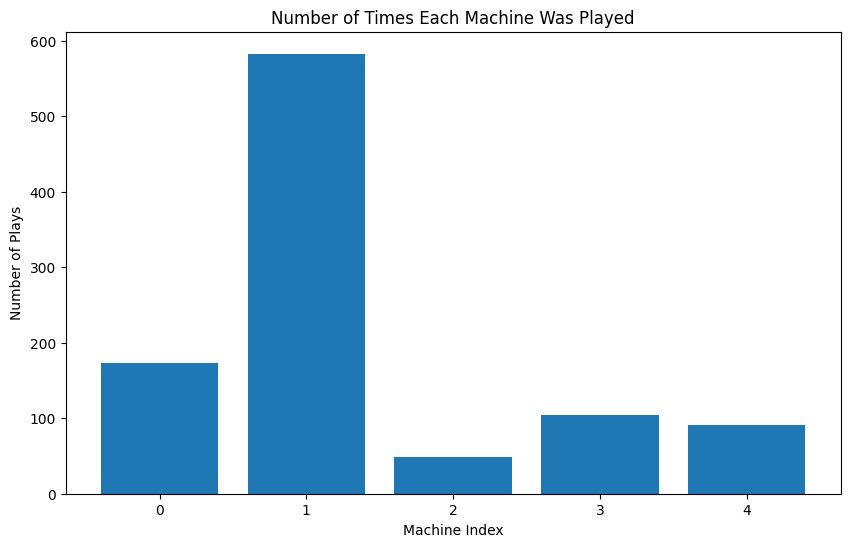

In [54]:
plt.figure(figsize=(10,6))
plt.bar(range(n_machines), n_pulls)
plt.title('Number of Times Each Machine Was Played')
plt.xlabel('Machine Index')
plt.ylabel('Number of Plays')
plt.show()

Number of Times Each Machine is Played: Initially, the algorithm explores all machines, but over time, it starts exploiting the best machine (the one with the highest probability of reward).